In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

data = pd.read_csv('../data/train.csv')
data.head()

# Code ends here

,Id,TITLE,CATEGORY
0,50846,Ukraine to get $18 billion rescue from IMF,b
1,234375,McDonald's Abandons Headquarters to Avoid Prot...,b
2,63422,New study finds evidence that Autism begins in...,m
3,353942,Prime Minister Modi Says Meeting With Facebook...,t
4,311586,New robot guides at Tokyo museum almost outper...,t


### Visualize and Preprocess the data

- Retaining only alphabets (Using regular expressions)
- Removing stopwords (Using nltk library)

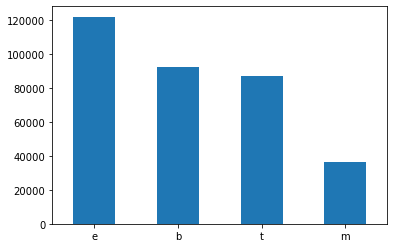

In [3]:
data.CATEGORY.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

In [4]:
# Code starts here

# retain only alphabets
data['TITLE'] = data['TITLE'].apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

# Code ends here

In [5]:
# Code starts here

stop = set(stopwords.words('english'))

# convert to lowercase and tokenize
data['TITLE'] = data['TITLE'].apply(lambda x:x.lower().split())

# remove stopwords
data['TITLE'] = data['TITLE'].apply(lambda x:[i for i in x if i not in stop])

# join list elements
data['TITLE'] = data['TITLE'].apply(lambda x: ' '.join(x))

# Code ends here

In [6]:
# Code starts here
X_train, X_test, y_train, y_test = train_test_split(data['TITLE'], data['CATEGORY'], test_size = 0.3, random_state = 42)

# initialize count vectorizer
count_vectorizer = CountVectorizer()

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# fit and transform with count vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


# fit and transform with tfidf vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Code ends here

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(236554,) (236554,)
(101381,) (101381,)


In [8]:
print(X_train_count.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)

(236554, 40795) (236554,)
(101381, 1501240) (101381,)


### Model building

- Now let's come to the actual task, using any classifier, predict the `CATEGORY`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [9]:
# initialize multinomial naive bayes
nb_1 = MultinomialNB()
nb_2 = MultinomialNB()

# fit on count vectorizer training data
nb_1.fit(X_train_count, y_train)

# fit on tfidf vectorizer training data
nb_2.fit(X_train_tfidf, y_train)

# accuracy with count vectorizer
acc_count_nb = accuracy_score(nb_1.predict(X_test_count), y_test)

# accuracy with tfidf vectorizer
acc_tfidf_nb = accuracy_score(nb_2.predict(X_test_tfidf), y_test)


# display accuracies
print(acc_count_nb, acc_tfidf_nb)

0.9253903591402728 0.9266036042256438


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [10]:
# Code Starts here
# Prediction on test data

test = pd.read_csv("../data/test.csv")

# Storing the id from the test file
id_ = test['Id']

# Apply the transformations on test
# retain only alphabets
test['TITLE'] = test['TITLE'].apply(lambda x:re.sub("[^a-zA-Z]", " ",x))

# convert to lowercase and tokenize
test['TITLE'] = test['TITLE'].apply(lambda x:x.lower().split())

# remove stopwords
test['TITLE'] = test['TITLE'].apply(lambda x:[i for i in x if i not in stop])

# join list elements
test['TITLE'] = test['TITLE'].apply(lambda x: ' '.join(x))


test_count = count_vectorizer.transform(test['TITLE'])
test_tfidf = tfidf_vectorizer.transform(test['TITLE'])


# Predict on the test data
y_pred_test = nb_2.predict(test_tfidf)
print(test_count.shape)
y_pred_test = y_pred_test.flatten()
y_pred_test
# Code ends here

(84484, 40795)


array(['m', 't', 'm', ..., 'e', 'b', 'e'], dtype='<U1')

In [11]:
# # Create a sample submission file
# sample_submission = pd.DataFrame({'Id':id_,'CATEGORY':y_pred_test})
# print(sample_submission.head())

# # Convert the sample submission file into a csv file
# sample_submission.to_csv('sample_submission.csv',index=False)